In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pingouin as pg
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import math
import seaborn as sns
import pickle

/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
df_PCA_eigenvec = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Population_stratification/pca.eigenvec',
                    sep =' ', header=None)


In [3]:
df_PCA_eigenval = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Population_stratification/pca.eigenval',
                    sep =' ', header=None)

In [4]:
df_inbre = pd.read_csv('/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/experiments/Population_stratification/inbreeding_coefficient.ibc',
                    sep ='\t', header=0)


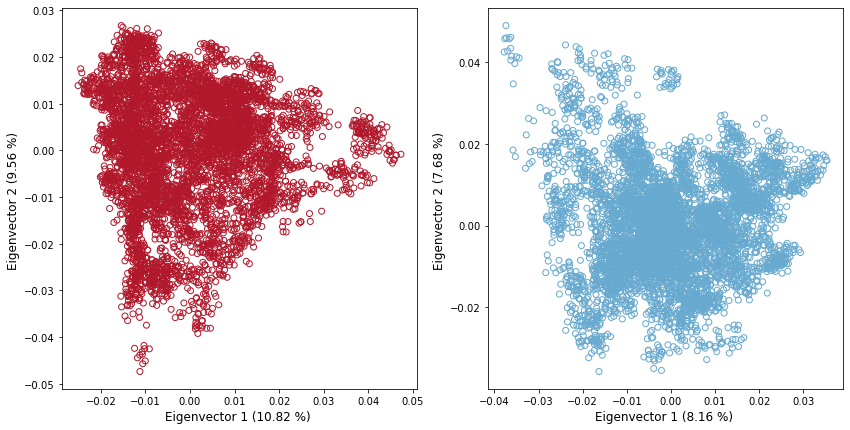

In [5]:
f, ax = plt.subplots(1,2, figsize=(14,7))
PC1_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[0, 0]*100, 2)
PC2_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[1, 0]*100, 2)
PC3_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[2, 0]*100, 2)
PC4_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[3, 0]*100, 2)

ax[0].scatter(df_PCA_eigenvec[2], df_PCA_eigenvec[3] ,marker = 'o', facecolors='none', edgecolor='#b2182b')
ax[0].set_xlabel("Eigenvector 1 ({:.2f} %) ".format(PC1_var), fontsize=12)
ax[0].set_ylabel("Eigenvector 2 ({:.2f} %) ".format(PC2_var), fontsize=12)

ax[1].scatter(df_PCA_eigenvec[4], df_PCA_eigenvec[5] ,marker = 'o', facecolors='none', edgecolor='#67a9cf')
ax[1].set_xlabel("Eigenvector 1 ({:.2f} %) ".format(PC3_var), fontsize=12)
ax[1].set_ylabel("Eigenvector 2 ({:.2f} %) ".format(PC4_var), fontsize=12)
plt.show()

In [6]:
df_inbre

,FID,IID,NOMISS,Fhat1,Fhat2,Fhat3
0,0,20191209_Plate1_1B,4186080.0,0.017269,-0.033037,-0.007884
1,0,20191209_Plate1_1D,4186080.0,0.029184,-0.054946,-0.012881
2,0,20191209_Plate1_1E,4186080.0,0.069839,-0.052300,0.008769
3,0,20191209_Plate1_1F,4186080.0,0.061399,-0.053427,0.003986
4,0,20191209_Plate1_1G,4186080.0,0.127230,-0.153492,-0.013131
...,...,...,...,...,...,...
5754,0,20201222_Plate2_12B,4186080.0,0.080362,-0.085521,-0.002580
5755,0,20201222_Plate2_12C,4186080.0,0.079892,-0.090483,-0.005295
5756,0,20201222_Plate2_12D,4186080.0,0.076469,-0.085526,-0.004528
5757,0,20201222_Plate2_12E,4186080.0,0.060704,-0.085207,-0.012252


In [7]:
def classify(x):
    if x>0.2:
        return '>0.2'
    else:
        return '<0.2'
df_com = pd.concat((df_PCA_eigenvec[[1,2,3,4,5]].set_index(1), df_inbre.iloc[:, 1:].set_index('IID')),axis=1)
df_com['cat_phat3']=df_com['Fhat3'].apply(lambda x: classify(x))
df_com.columns.values[:4] = list('eigenvector_'+str(i) for i in range(1,5))
df_com

,eigenvector_1,eigenvector_2,eigenvector_3,eigenvector_4,NOMISS,Fhat1,Fhat2,Fhat3,cat_phat3
20191209_Plate1_1B,-0.013021,0.007070,-0.010540,0.002830,4186080.0,0.017269,-0.033037,-0.007884,<0.2
20191209_Plate1_1D,-0.014410,0.007938,-0.006790,0.005967,4186080.0,0.029184,-0.054946,-0.012881,<0.2
20191209_Plate1_1E,-0.015355,0.006581,-0.010345,0.003790,4186080.0,0.069839,-0.052300,0.008769,<0.2
20191209_Plate1_1F,-0.014197,0.009798,-0.010974,0.005250,4186080.0,0.061399,-0.053427,0.003986,<0.2
20191209_Plate1_1G,-0.011596,-0.024979,-0.005801,-0.006410,4186080.0,0.127230,-0.153492,-0.013131,<0.2
...,...,...,...,...,...,...,...,...,...
20201222_Plate2_12B,-0.002981,-0.026050,0.014721,0.004163,4186080.0,0.080362,-0.085521,-0.002580,<0.2
20201222_Plate2_12C,-0.004405,-0.026621,0.016675,0.006605,4186080.0,0.079892,-0.090483,-0.005295,<0.2
20201222_Plate2_12D,-0.003060,-0.026914,0.017514,0.005074,4186080.0,0.076469,-0.085526,-0.004528,<0.2
20201222_Plate2_12E,-0.006172,-0.027786,0.015667,0.005928,4186080.0,0.060704,-0.085207,-0.012252,<0.2


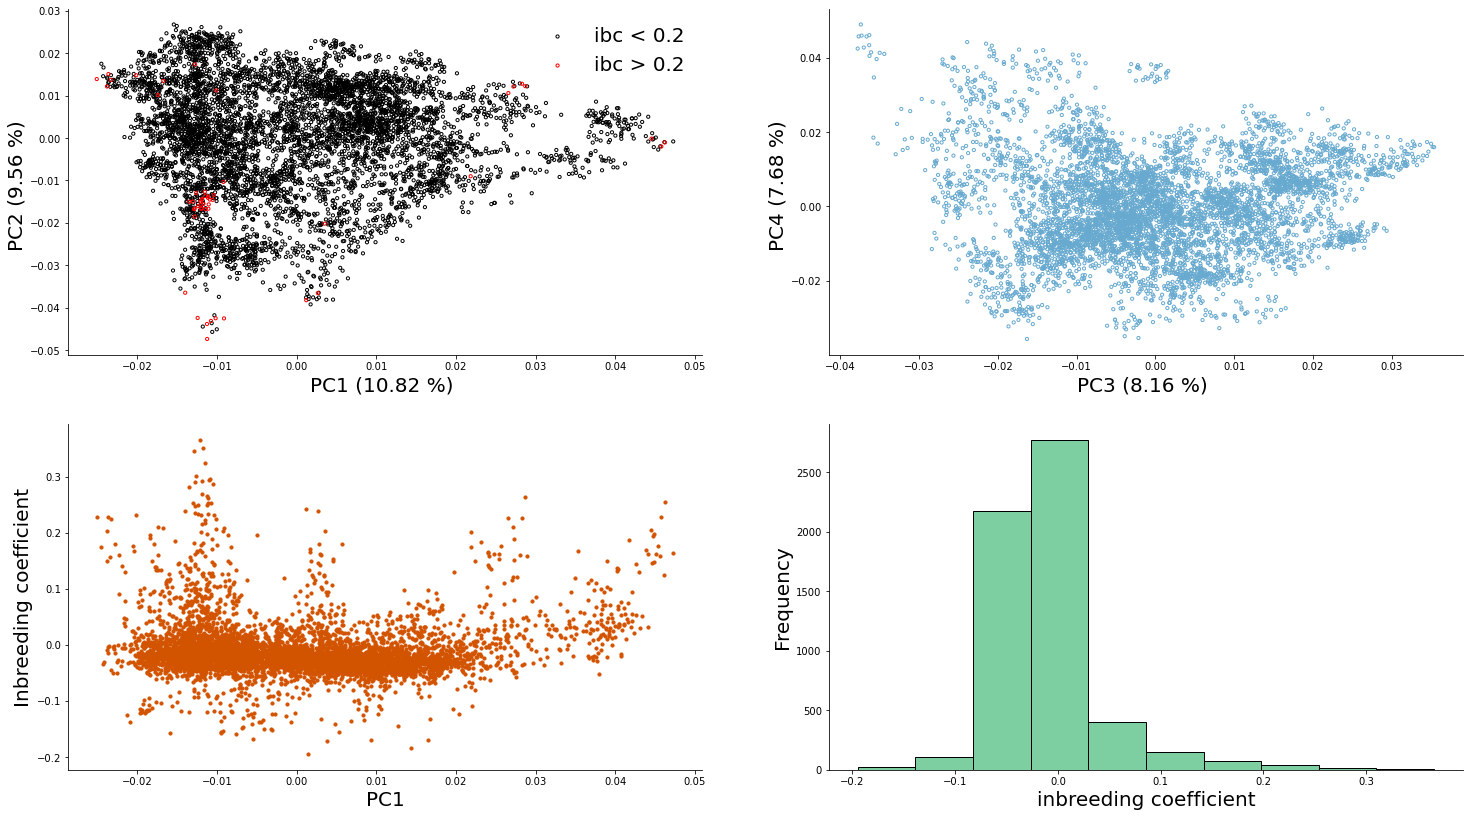

In [20]:
PC1_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[0, 0]*100, 2)
PC2_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[1, 0]*100, 2)
PC3_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[2, 0]*100, 2)
PC4_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[3, 0]*100, 2)

f, ax = plt.subplots(2,2, figsize=(25,14))
for i in range(0,2):
    for j in range(0,2):
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
ax[0][0].scatter(x=df_com.loc[df_com['cat_phat3']=='<0.2']['eigenvector_1'], y=df_com.loc[df_com['cat_phat3']=='<0.2']['eigenvector_2'], 
              edgecolor = 'black', facecolors='none', label='ibc < 0.2', s=10)
ax[0][0].scatter(x=df_com.loc[df_com['cat_phat3']=='>0.2']['eigenvector_1'], y=df_com.loc[df_com['cat_phat3']=='>0.2']['eigenvector_2'], 
              edgecolor = 'r', facecolors='none', label='ibc > 0.2', s=10)
ax[0][0].set_xlabel("PC1 ({:.2f} %) ".format(PC1_var), fontsize=20)
ax[0][0].set_ylabel("PC2 ({:.2f} %) ".format(PC2_var), fontsize=20)
ax[0][0].legend(edgecolor='none', fontsize=20)

ax[0][1].scatter(df_com['eigenvector_3'], df_com['eigenvector_4'] ,marker = 'o', facecolors='none', edgecolor='#67a9cf', s=10)
ax[0][1].set_xlabel("PC3 ({:.2f} %) ".format(PC3_var), fontsize=20)
ax[0][1].set_ylabel("PC4 ({:.2f} %) ".format(PC4_var), fontsize=20)

ax[1][0].scatter(x=df_com['eigenvector_1'], y=df_com['Fhat3'], facecolors='#D35400', s=10)
ax[1][0].set_xlabel("PC1", fontsize=20)
ax[1][0].set_ylabel("Inbreeding coefficient", fontsize=20)

ax[1][1].hist(df_com['Fhat3'], edgecolor='black',facecolor='#7DCEA0')
ax[1][1].set_xlabel('inbreeding coefficient', fontsize=20)
ax[1][1].set_ylabel("Frequency", fontsize=20)
plt.show()

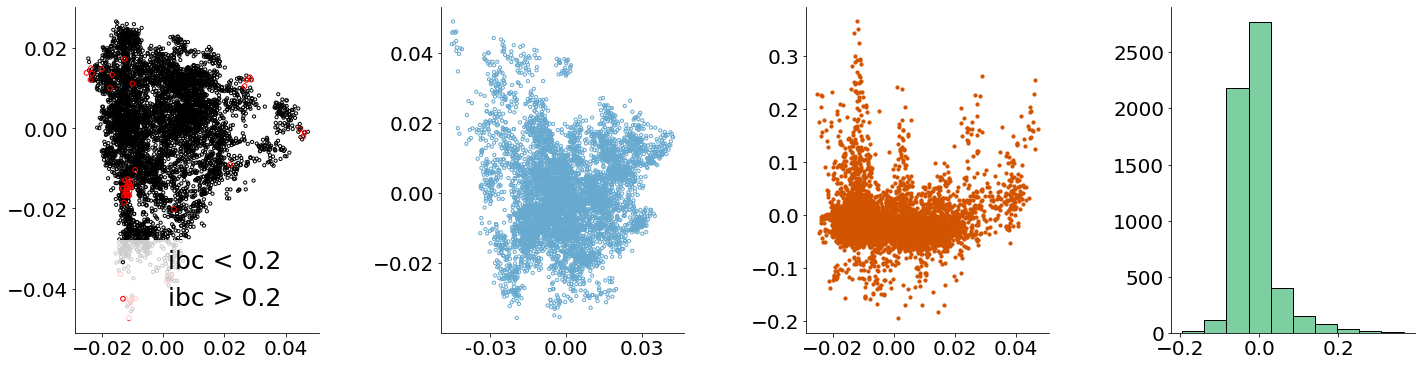

In [42]:
from matplotlib.ticker import FormatStrFormatter
PC1_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[0, 0]*100, 2)
PC2_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[1, 0]*100, 2)
PC3_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[2, 0]*100, 2)
PC4_var = round((df_PCA_eigenval/df_PCA_eigenval.iloc[:20, :].sum()).iloc[3, 0]*100, 2)
f, ax = plt.subplots(1,4, figsize=(24,6))
plt.subplots_adjust(wspace=0.5)
for i in range(0,4):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
ax[0].scatter(x=df_com.loc[df_com['cat_phat3']=='<0.2']['eigenvector_1'], y=df_com.loc[df_com['cat_phat3']=='<0.2']['eigenvector_2'], 
              edgecolor = 'black', facecolors='none', label='ibc < 0.2', s=10)
ax[0].scatter(x=df_com.loc[df_com['cat_phat3']=='>0.2']['eigenvector_1'], y=df_com.loc[df_com['cat_phat3']=='>0.2']['eigenvector_2'], 
              edgecolor = 'r', facecolors='none', label='ibc > 0.2', s=22)
#ax[0][0].set_xlabel("PC1 ({:.2f} %) ".format(PC1_var), fontsize=20)
#ax[0][0].set_ylabel("PC2 ({:.2f} %) ".format(PC2_var), fontsize=20)
ax[0].legend(edgecolor='none', fontsize=25)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].scatter(df_com['eigenvector_3'], df_com['eigenvector_4'] ,marker = 'o', facecolors='none', edgecolor='#67a9cf', s=10)
#ax[0][1].set_xlabel("PC3 ({:.2f} %) ".format(PC3_var), fontsize=20)
#ax[0][1].set_ylabel("PC4 ({:.2f} %) ".format(PC4_var), fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax[2].scatter(x=df_com['eigenvector_1'], y=df_com['Fhat3'], facecolors='#D35400', s=10)
#ax[1][0].set_xlabel("PC1", fontsize=20)
#ax[1][0].set_ylabel("Inbreeding coefficient", fontsize=20)
ax[2].tick_params(axis='both', which='major', labelsize=20)

ax[3].hist(df_com['Fhat3'], edgecolor='black',facecolor='#7DCEA0')
#ax[1][1].set_xlabel('inbreeding coefficient', fontsize=20)
#ax[1][1].set_ylabel("Frequency", fontsize=20)
ax[3].tick_params(axis='both', which='major', labelsize=20)
plt.show()